# Importing Basic Dependencies

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [243]:
df = pd.read_csv('laptop_prices_aud.csv')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1314.195764
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,881.833215
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,564.057778
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2489.162448
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1769.277579


## High level EDA

In [244]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [245]:
# checking for duplicated rows
df.duplicated().sum()

29

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [247]:
# convert columns to proper Dtypes
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

In [248]:
# Check unique values for each column
def count_val(col):
    print(f'Columns {col} counts: {df[col].value_counts()}')
    
for col in df.loc[:,~df.columns.isin(['Price'])].columns:
    count_val(col)
    print("-"*80)

Columns Company counts: Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
--------------------------------------------------------------------------------
Columns TypeName counts: Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
--------------------------------------------------------------------------------
Columns Inches counts: 15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, 

In [249]:
# Convert Ram and Weight into integers

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column
df['Ram'] = df['Ram'].astype('int32')

# converting from string-> float for the weight column
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579


# Detailed EDA

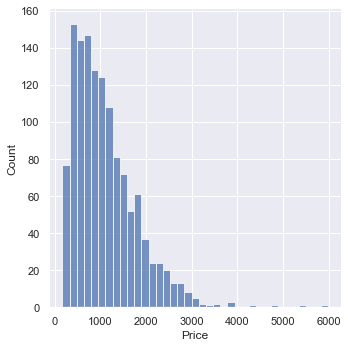

In [250]:
# Distribution of target variable
sns.displot(data = df.Price)

The distribution is right-skewed

#### Plot categorical columns

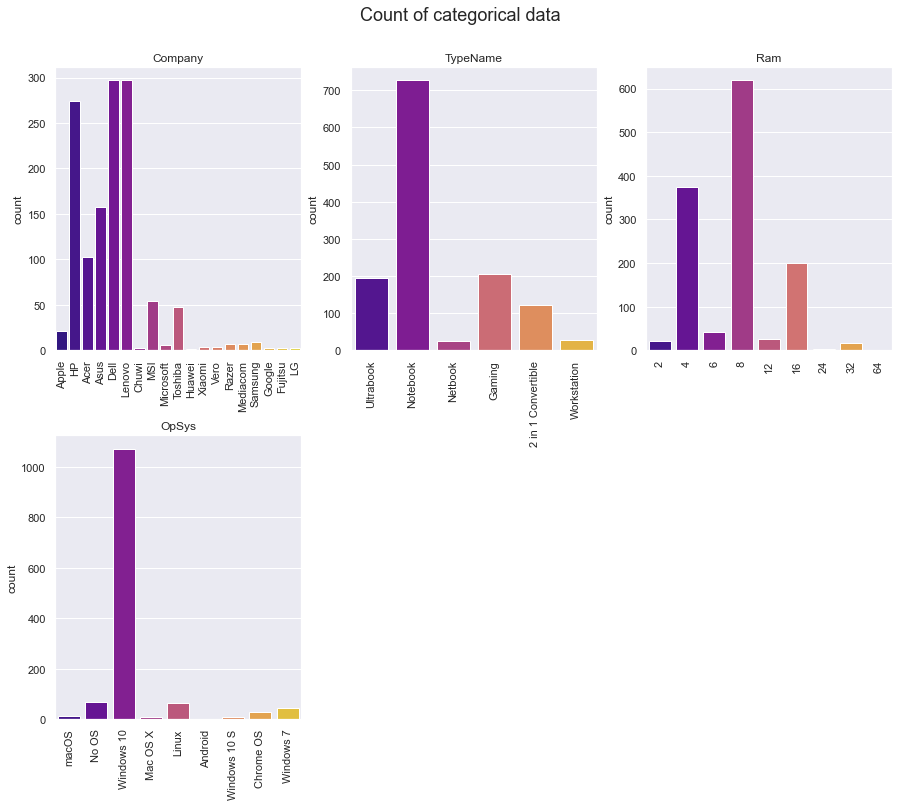

In [251]:
# list all the columns that you want to plot
col_countplot = ['Company', 'TypeName','Ram','OpSys']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Count of categorical data", fontsize=18, y=0.95)

# set number of columns
ncols = 3
# calculate number of rows
nrows = len(col_countplot) // ncols + (len(col_countplot) % ncols > 0)

# loop through the columns that need to be plotted
for n, col in enumerate(col_countplot):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)
    sns.countplot(data = df, x = df[col],palette='plasma',ax = ax)
    plt.xticks(rotation='vertical')

    # chart formatting
    ax.set_title(col)
#     ax.get_legend().remove()
    ax.set_xlabel("")
#     ax.set_title("abc")

Notes:
Count of laptops by type

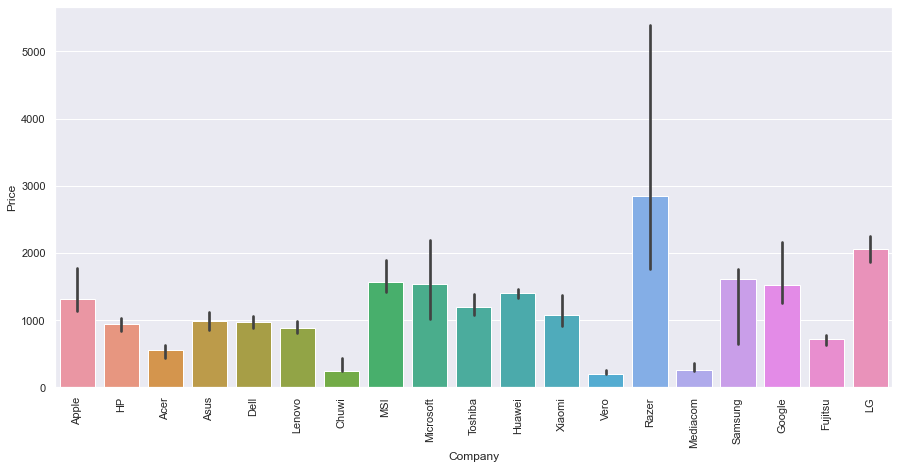

In [252]:
# median prices per laptop accross different brands
plt.figure(figsize=(15,7))
sns.barplot(x = df['Company'],y = df['Price'], estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

''

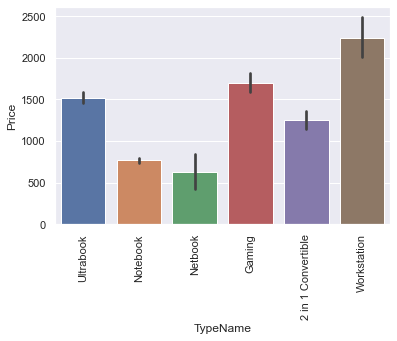

In [253]:
# Comparing average prices accross different laptop types

sns.barplot(data = df,x = 'TypeName',y = df['Price'])
plt.xticks(rotation = 'vertical')
;


Notebooks have a lower average price and a very tight range. This makes sense because it is also the most populate type of machine, so the prices would be very close between different brands.  
More specialised machines suche as Gaming and Workstations would have higher prices and larger ranges because they are more powerful.

''

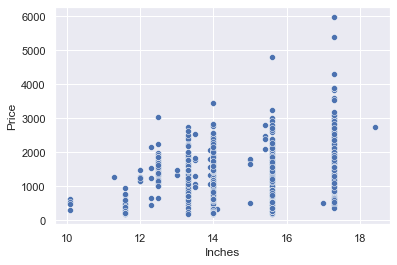

In [254]:
# Looking at screen sizes against prices

sns.scatterplot(data = df,x = 'Inches',y = 'Price')
;

**For the `Screen Resolution` column there a lot of different values. We need to clean this column to extract just the most important/usefull details**

In [255]:
df['ScreenResolution'].value_counts().head()

Full HD 1920x1080                            507
1366x768                                     281
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     53
Full HD / Touchscreen 1920x1080               47
Name: ScreenResolution, dtype: int64

In [256]:
# extracting touchscreen laptops
df['TouchScreen'] = df.ScreenResolution.apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

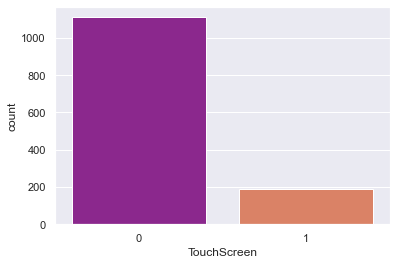

In [257]:
sns.countplot(data = df, x = 'TouchScreen',palette='plasma')

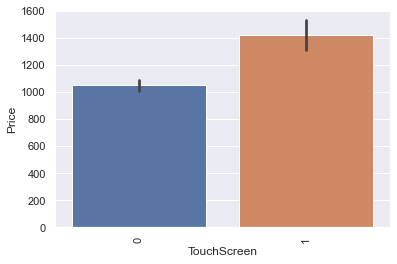

In [258]:
# looking at prices accross touchscreens
sns.barplot(data = df, x = 'TouchScreen', y = 'Price')
plt.xticks(rotation = 'vertical');

In [259]:
# extract IPS laptops
df['IPS'] = df.ScreenResolution.apply(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
701,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4,256GB SSD,AMD Radeon 530,Windows 10,2.20,391.407049,0,0
1203,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.20,2628.999729,1,0
289,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,646.469071,0,0
979,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99,1715.716614,0,0
1098,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,490.485024,0,0


<AxesSubplot:xlabel='IPS', ylabel='count'>

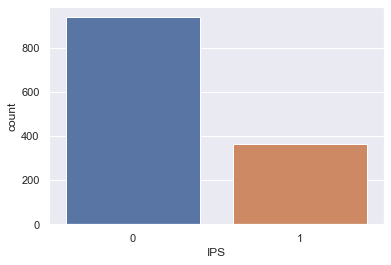

In [260]:
# looking at counts of IPS laptops
sns.countplot(data = df, x = 'IPS')

''

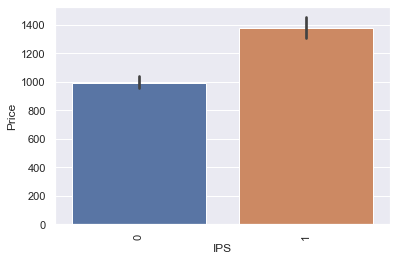

In [261]:
# looking at prices accross IPS laptops
sns.barplot(data = df, x = 'IPS', y = 'Price')
plt.xticks(rotation = 'vertical')
;

### Extracting the X Resolution and the Y Resolution

In [262]:
## with regards to Resolution, need to extract it from ScreenResoltuion column. We have resolution accross the X and Y axis.
## extract those and maybe create a new feature of PPI.

In [263]:
df.ScreenResolution.head()

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: ScreenResolution, dtype: object

In [264]:
# split the value in each row on letter 'x'
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
# rename columns
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]

'''
find all numbers from that string: "\d+\.?\d+"
\d  = integer number 
\.? = all numbers that come after a number 
\d+ = the string must end with number
'''
## using regex to extract the X axis resolution
## remove all commans
## extract all numbers from the string

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
# convert resolutions to integer
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,2560,1600


<AxesSubplot:>

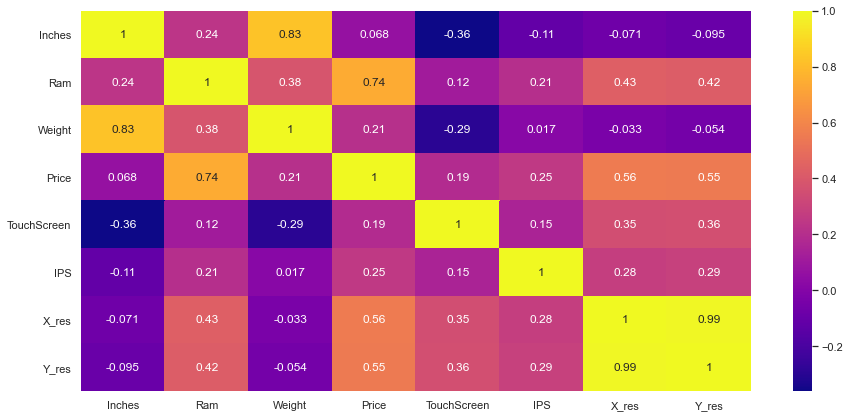

In [265]:
# looking at initial heatmap of the variables
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [266]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**From the correlation plot we can see that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated. These columns can provide additional data for the final model**

**Lets create a new columns named `PPI{pixels per inch}`. This will combine columns `Inches, X_res, Y_res`.**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [267]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,2560,1600,226.983005


In [268]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

**Strong correlation between `PPI` and `Price`**

In [269]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005


**Extracting useful information from `CPU` column**

In [270]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Most common processors are from Intel and AMD. I'll keep these two seperate while groupping all other together

In [271]:
# extract CPU name from CPU column
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5


In [272]:
## Grouping CPUs into Intel i3/i5/i7 and AMD and Other

def processortype(value):
    
    if value=='Intel Core i7' or value=='Intel Core i5' or value=='Intel Core i3':
        return value
    
    else:
        if value.split()[0]=='Intel':
            return 'Other Intel'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda x:processortype(x))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5


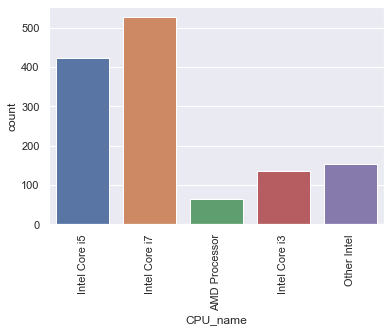

In [273]:
sns.countplot(data = df, x = df.CPU_name)
plt.xticks(rotation = 'vertical');

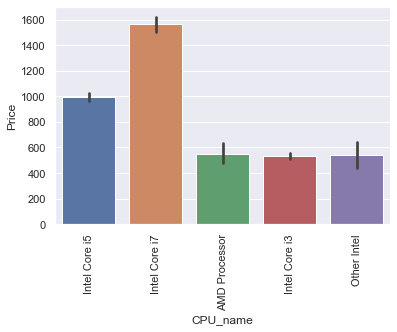

In [274]:
# price vs processor variation

sns.barplot(data = df, x = 'CPU_name', y = 'Price')
plt.xticks(rotation = 'vertical');

In [275]:
## dropping the cpu column
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5


##### Looking at RAM column

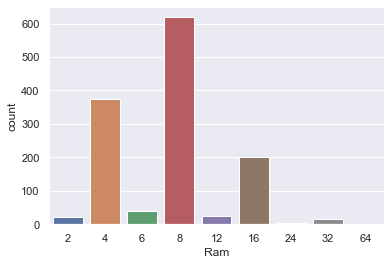

In [276]:
sns.countplot(data = df, x = 'Ram');

<AxesSubplot:xlabel='Ram', ylabel='Price'>

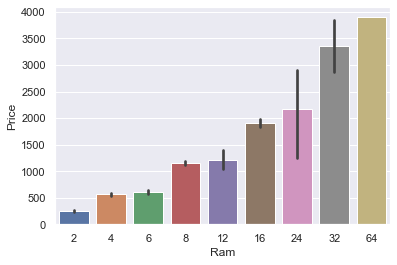

In [277]:
## Linear relationship between RAM and price. 
## This makes sense since RAM is an expensive component
sns.barplot(data = df, x = 'Ram', y = 'Price')

# sns.barplot(df['Ram'],df['Price'])

##### Memory column

**Seperate the `Type` of memory and the actual`value`**

In [280]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5


In [281]:
## Memory types : HHD,SSD,Flash,Hybrid

# remove the decimal space: 1.0 TB --> 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word with "+"

temp_df = df['Memory'].str.split("+",n = 1,expand = True)

temp_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [282]:
# we will strip white spaces

df['first'] = temp_df[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5,256 SSD


In [283]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
memory_types = ['HDD','SSD','Hybrid','FlashStorage']    
for value in memory_types:
    applychanges(value)
    

In [284]:
    
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0


In [285]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

<ipython-input-285-b2a2a09a6769>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [286]:
df['Second'] = temp_df[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [287]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

<ipython-input-287-592fc9192f78>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [288]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,...,256,0,1,0,0,0,0,0,0,0


In [289]:
# multiplying the elements and storing the result in subsequent columns

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

## drop uncessary columns
df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage','Memory'],inplace=True)

In [290]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
452,HP,Workstation,8,Intel HD Graphics 620,Windows 10,2.31,1504.808054,0,1,141.211998,Intel Core i7,0,512,0,0
834,Lenovo,Notebook,8,Intel HD Graphics 620,Windows 10,1.32,1618.600579,0,1,157.350512,Intel Core i5,0,256,0,0
1083,HP,Ultrabook,16,Intel HD Graphics 620,Windows 10,1.30,2010.007628,0,1,331.264236,Intel Core i7,0,512,0,0
484,Lenovo,Notebook,4,Intel HD Graphics 520,Windows 10,2.30,554.248077,0,0,100.454670,Intel Core i3,0,128,0,0
230,Asus,Notebook,4,Intel HD Graphics 620,Windows 10,2.37,391.397239,0,0,100.454670,Intel Core i3,1000,0,0,0


In [291]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

Correlation of Hybrid and Flash is negligible. Can remove it.  
Negative correlation between HDD and price, this makes sense since a more expensive laptop is unlikely to have HDD but instead would have SSD

In [292]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5,0,256


##### Looking at GPU column

In [293]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Focus on `GPU brands` only**

<AxesSubplot:xlabel='Gpu_type', ylabel='count'>

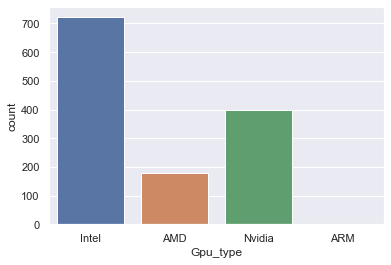

In [294]:
df['Gpu_type'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(data = df, x = 'Gpu_type')

<AxesSubplot:xlabel='Gpu_type', ylabel='count'>

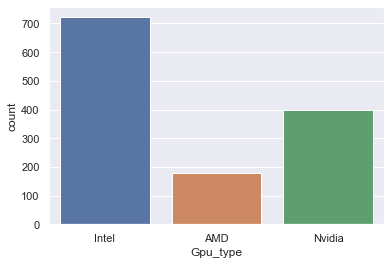

In [295]:
# removing ARM since it negligible

df = df[df['Gpu_type']!='ARM']
sns.countplot(data = df, x = 'Gpu_type')

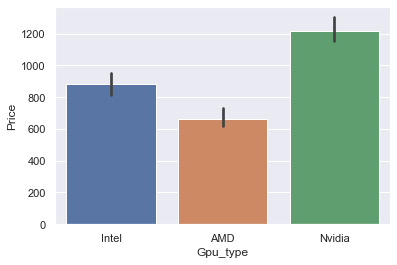

In [296]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sns.barplot(data = df, x = 'Gpu_type', y = 'Price',estimator=np.median);

In [297]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_type
0,Apple,Ultrabook,8,macOS,1.37,1314.195764,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,881.833215,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,564.057778,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2489.162448,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1769.277579,0,1,226.983005,Intel Core i5,0,256,Intel


##### Operating System

In [298]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

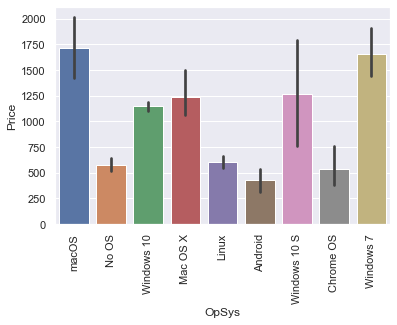

In [299]:
sns.barplot(data = df,x = 'OpSys', y = 'Price')
plt.xticks(rotation = 'vertical');

In [300]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [301]:
# group {Windows 10,Windows 7,Windows 7 S}-->Windows
# group {macOS,mac OS X}--> mac
# else return Others

def setcategory(value):
    
    if value=='Windows 10' or value=='Windows 7' or value=='Windows 10 S':
        return 'Windows'
    
    elif value=='Mac OS X' or value=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_type
0,Apple,Ultrabook,8,Mac,1.37,1314.195764,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,881.833215,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,564.057778,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,2489.162448,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1769.277579,0,1,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot:xlabel='OpSys', ylabel='count'>

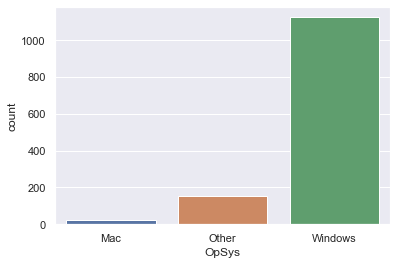

In [302]:
sns.countplot(data = df, x = 'OpSys')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

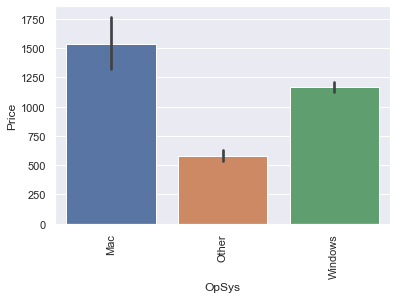

In [303]:
sns.barplot(x = 'OpSys',y = 'Price', data = df)
plt.xticks(rotation = 'vertical')

###### Weight analysis 

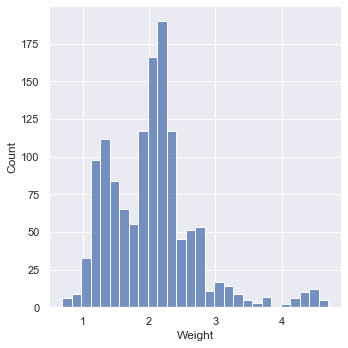

In [304]:
sns.displot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

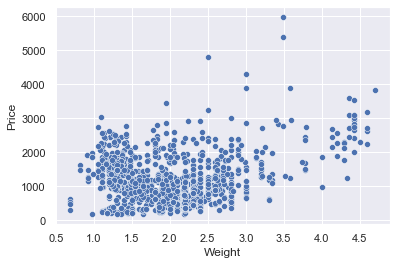

In [305]:
sns.scatterplot(data = df, x = 'Weight',y = 'Price')

##### Price Analysis

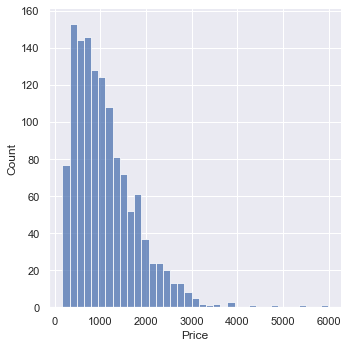

In [306]:
sns.displot(df['Price'])

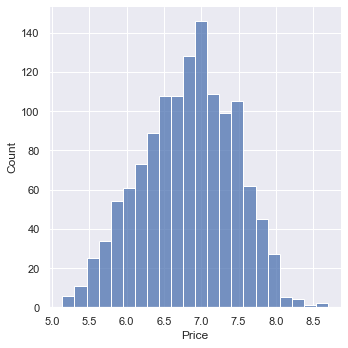

In [307]:
# Apply np.log to the Price to transform it into almost normal distribution

sns.displot(np.log(df['Price']))

In [308]:
## correlation with price

df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

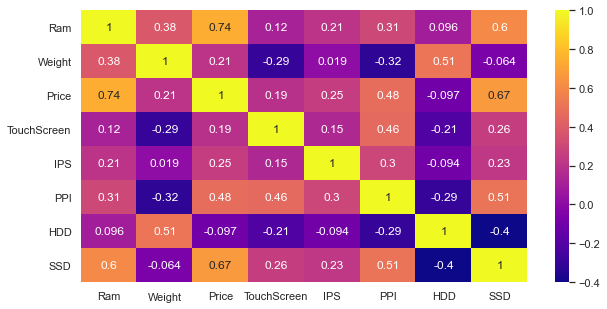

In [309]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building

In [313]:
y = np.log(df['Price'])
X = df.drop(['Price'],axis = 1)


In [314]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.15,random_state=42)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

### Linear Regression

In [316]:
cat_columns = ['Company','TypeName','OpSys','CPU_name','Gpu_type']


cat_transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse = False),cat_columns)
],remainder = 'passthrough')

pipe = Pipeline([
    ('ohe',cat_transformer),
    ('lr', LinearRegression())
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MAE_exp',np.exp(metrics.mean_absolute_error(y_test,y_pred)))

R2 score 0.7924857609368756
MAE 0.21372233894892056
MAE_exp 1.2382787852670278


### Ridge Regression

In [317]:
cat_columns = ['Company','TypeName','OpSys','CPU_name','Gpu_type']


cat_transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse = False),cat_columns)
],remainder = 'passthrough')

pipe = Pipeline([
    ('ohe',cat_transformer),
    ('lr', Ridge(alpha =10))
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MAE_exp',np.exp(metrics.mean_absolute_error(y_test,y_pred)))

R2 score 0.7897142428736266
MAE 0.21635013865112357
MAE_exp 1.2415370130002021


### LassoRegression

In [318]:
cat_columns = ['Company','TypeName','OpSys','CPU_name','Gpu_type']


cat_transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse = False),cat_columns)
],remainder = 'passthrough')

pipe = Pipeline([
    ('ohe',cat_transformer),
    ('lr', Lasso(alpha =0.001))
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MAE_exp',np.exp(metrics.mean_absolute_error(y_test,y_pred)))

R2 score 0.7922506345905401
MAE 0.21541447337437333
MAE_exp 1.2403758932217774


### Decision Tree

In [319]:
cat_columns = ['Company','TypeName','OpSys','CPU_name','Gpu_type']


cat_transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse = False),cat_columns)
],remainder = 'passthrough')

pipe = Pipeline([
    ('ohe',cat_transformer),
    ('lr', DecisionTreeRegressor(max_depth = 8))
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MAE_exp',np.exp(metrics.mean_absolute_error(y_test,y_pred)))

R2 score 0.8246133832267901
MAE 0.1971813860163427
MAE_exp 1.2179649424800179


### Random Forest

In [320]:
cat_columns = ['Company','TypeName','OpSys','CPU_name','Gpu_type']


cat_transformer = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse = False),cat_columns)
],remainder = 'passthrough')

pipe = Pipeline([
    ('ohe',cat_transformer),
    ('lr', RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15))
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MAE_exp',np.exp(metrics.mean_absolute_error(y_test,y_pred)))

R2 score 0.8535094954431155
MAE 0.17039328445853785
MAE_exp 1.185771104976168


In [321]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [143]:
train.to_csv('train.csv',index=None)

## Hyperparameter Tuning for Random Forest 

In [323]:
# transform categorical columns outside the pipeline
# this avoids missing columns in the test set
# for example if Company is Huawei, which does not have many laptop, when data is split into train/test it's possible that no Huawei laptop make it into the test set
X = pd.get_dummies(X,columns=cat_columns,drop_first=True)
X.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel,Gpu_type_Intel,Gpu_type_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [324]:
# split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

In [325]:
param_grid=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
#             'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[5,10,12,15],
#             'max_features':['auto','sqrt','log2'],
#             'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
#             'min_samples_split':[2,5,10,14],
#             'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [326]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(param_grid['RandomForest']['model'],param_grid['RandomForest']['params'],cv = 2, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [327]:
print('best_score: ',grid_search.best_score_)
print('best_estimator: ',grid_search.best_estimator_)

best_score:  -0.05778809585030604
best_estimator:  RandomForestRegressor(criterion='mae', max_depth=15)


In [328]:
rf = RandomForestRegressor(criterion='mae', max_depth=15)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8798829962967165


## Prediction on the whole Dataset

In [331]:
# run the prediction over the whole dataset to see how close the predicted values are to actual values
predicted = []
X_array = np.array(X)
for i in range(len(X_array)):
    predicted.append(rf.predict([X_array[i]]))
 
# undo the original transformation on the Price
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

df['Predicted Price'] = np.array(ans)

<AxesSubplot:xlabel='Price', ylabel='Density'>

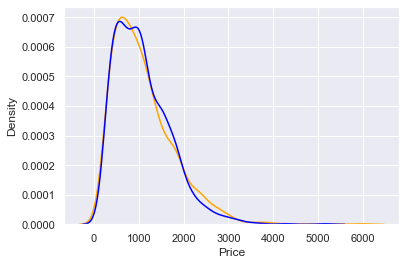

In [332]:
ax = sns.kdeplot(data = df, x = 'Price',color='orange')
sns.kdeplot(data = df, x = 'Predicted Price',color='blue', ax=ax)